# 문제 1. 표본조사 체험하기

### 📘 문제

- 온라인 쇼핑몰은 전체 고객 수가 너무 많아, 모든 고객을 조사하기 어렵습니다.

- 그래서 무작위로 고객 30명을 뽑아 평균 만족도를 계산하고 이를 전체 만족도의 추정값으로 사용하려 합니다.

- 이번 실습에서는 직접 표본을 뽑고, 표본 평균을 구해보며,
  **“표본마다 결과가 달라질 수 있다”**는 추론 통계의 핵심 개념을 체험해봅니다.

### 📌 아래를 수행해 보세요:

- 표본을 무작위로 여러 번 뽑아 보고, 표본 평균이 어떻게 변하는지 확인해봅시다.

- 히스토그램을 그리고, 표본 평균의 분포 형태를 관찰해봅시다.



In [1]:
# 파이썬 라이브러리 및 모듈 가져오기 & 한글 폰트 설정하기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

# MacOS에서는 기본 한글 폰트로 AppleGothic 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

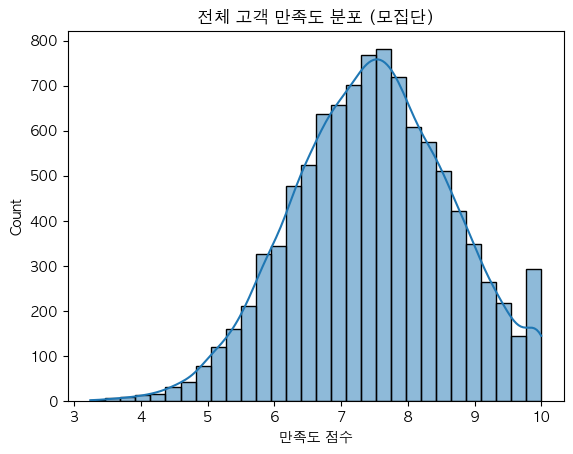

In [2]:
# 모집단 생성 (전체 고객 만족도 10,000명)
np.random.seed(2025)
population = np.random.normal(loc=7.5, scale=1.2, size=10000)       # 평균 7.5, 표준편차 1.2
population = np.clip(population, 1, 10)     # 1점 ~ 10점 사이로 제한
df_pop = pd.DataFrame({'score': population})

# 전체 모집단 시각화
sns.histplot(df_pop['score'], bins = 30, kde=True)
plt.title("전체 고객 만족도 분포 (모집단)")
plt.xlabel("만족도 점수")
plt.show()

In [3]:
# Q1. 모집단에서 무작위로 30명을 뽑아 표본 평균을 구해봅시다.
sample = np.random.choice(df_pop['score'], size=30, replace=False)   # replace=False: 한 번 뽑힌 사람은 다시 뽑지 않음(비복원 추출)
sample_mean = sample.mean()
print("표본 평균:", round(sample_mean, 2))

표본 평균: 7.2


In [4]:
# Q2. 이 과정을 500번 반복하고, 표본 평균을 리스트에 저장합니다.
sample_means = []

for _ in range(500):
    sample = np.random.choice(df_pop['score'], size=30, replace=False)
    sample_means.append(sample.mean())

df_sample_means = pd.DataFrame({'mean': sample_means})
df_sample_means.head()

,mean
0,7.218310
1,7.576377
2,7.603218
3,7.258919
4,7.558776


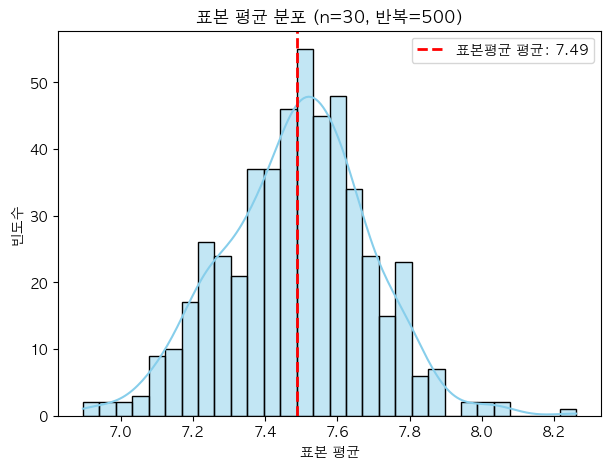

In [5]:
# Q3. 표본 평균들의 분포를 히스토그램으로 그려봅시다. 평균선도 함께 표시해 봅시다.

# 표본 평균들의 분포 시각화
plt.figure(figsize=(7, 5))
sns.histplot(sample_means, bins=30, kde=True, color="skyblue", edgecolor="black")

# 평균선 표시
mean_of_means = np.mean(sample_means)
plt.axvline(mean_of_means, color='red', linestyle='--', linewidth=2, label=f'표본평균 평균: {mean_of_means:.2f}')

plt.title("표본 평균 분포 (n=30, 반복=500)")
plt.xlabel("표본 평균")
plt.ylabel("빈도수")
plt.legend()
plt.show()

### 🧠 데이터를 어떻게 읽을까요?

- 표본 평균들은 어떤 값 주변에 많이 분포해 있나요? 이 값은 전체 모집단 평균과 얼마나 비슷한가요?

- 표본을 1번 뽑았을 때와 500번을 반복해서 뽑았을 때, 표본 평균의 분포나 신뢰성에는 어떤 차이가 있나요

- 친구가 다른 표본을 뽑았다면 같은 평균이 나왔을까요? 비슷한 결과가 나왔더라도 완전히 같지 않았다면, 그 이유는 무엇일까요?

- 표본 평균들의 분포는 어떤 모양인가요? 종 모양의 정규분포처럼 보이나요? 그렇다면 왜 그렇게 되는 걸까요?


### 🧠 데이터를 어떻게 읽을까요?

- 표본 평균들은 어떤 값 주변에 많이 분포해 있나요? 이 값은 전체 모집단 평균과 얼마나 비슷한가요?  
-> 표본 평균들은 모집단 평균(약 7.5) 주변에 몰려 있다. 즉, 무작위 추출로 계산한 표본 평균이 모집단 평균을 잘 추정하고 있음을 알 수 있다.  

- 표본을 1번 뽑았을 때와 500번을 반복해서 뽑았을 때, 표본 평균의 분포나 신뢰성에는 어떤 차이가 있나요?  
-> 1번만 뽑으면 표본 평균은 우연에 따라 크게 달라질 수 있다. 하지만 500번 반복하면 분포를 통해 평균이 어느 범위에 자주 위치하는지 알 수 있어서 훨씬 신뢰성이 높아진다.  

- 친구가 다른 표본을 뽑았다면 같은 평균이 나왔을까요? 비슷한 결과가 나왔더라도 완전히 같지 않았다면, 그 이유는 무엇일까요?  
-> 같은 모집단에서 뽑아도 무작위성이 있어서 결과가 조금씩 달라진다. 하지만 모집단 평균 근처에서 분포하므로 크게 벗어나진 않는다.  

- 표본 평균들의 분포는 어떤 모양인가요? 종 모양의 정규분포처럼 보이나요? 그렇다면 왜 그렇게 되는 걸까요?  
-> 표본 평균들의 분포는 종 모양의 정규분포 형태를 띠고 있다. 이는 중심극한정리에 의해, 표본 크기가 충분히 크면 모집단의 분포 모양과 관계없이 표본 평균 분포가 정규분포에 가까워지기 때문이다.  


# 문제 2. 중심극한정리

### 📘 문제

- 현실에서는 모집단의 분포가 정규분포가 아닐 수도 있습니다.

- 예를 들어, 일부 고객은 매우 높은 점수를 주고, 대부분은 낮은 점수를 주는 만족도 분포가 있을 수 있죠. (예: 지수분포)

- 이처럼 원래 분포가 비정규분포여도,
  표본을 여러 번 뽑아 평균을 계산하면, 그 평균들의 분포는 정규분포에 가까워진다는 것을
  **중심극한정리(Central Limit Theorem)**라고 합니다.

- 이번 실습에서는 다양한 크기의 표본을 뽑아 평균을 계산하고,
  그 평균들의 분포가 어떻게 변하는지를 직접 실험해 봅니다.

### 📌 아래를 수행해 보세요:

- 비대칭적인 모집단(지수분포)에서 무작위로 표본을 추출해 평균을 구해봅시다.

- 표본 크기를 바꿔가며, 표본 평균들의 분포가 어떻게 변화하는지 확인해봅시다.

- 히스토그램을 그리고, 분포의 모양을 관찰해봅시다.

- 표본 크기가 커질수록 표본 평균 분포의 모양과 **퍼진 정도(분산)**가 어떻게 변하는지 관찰해봅시다.


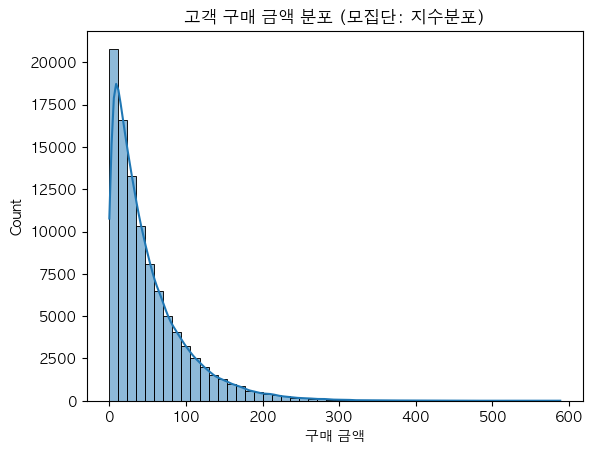

In [6]:
# 지수분포를 따르는 모집단 생성
np.random.seed(2025)
population = np.random.exponential(scale=50, size=100000)   # 평균 50, 비대칭 분포

# 모집단 시각화
sns.histplot(population, bins=50, kde=True)
plt.title("고객 구매 금액 분포 (모집단: 지수분포)")
plt.xlabel("구매 금액")
plt.show()

In [7]:
# Q1. 모집단에서 표본을 1000번 뽑고, 각 표본의 평균을 구해봅시다.
# 표본 크기 = 5일 때

sample_means_5 = [np.random.choice(population, size=5, replace=False).mean() for _ in range(1000)]

In [8]:
# Q2. 위 과정을 표본 크기 30, 100일 때도 반복해봅시다.
# sample_size = 30, 100

sample_means_30 = [np.random.choice(population, size=30, replace=False).mean() for _ in range(1000)]
sample_means_100 = [np.random.choice(population, size=100, replace=False).mean() for _ in range(1000)]

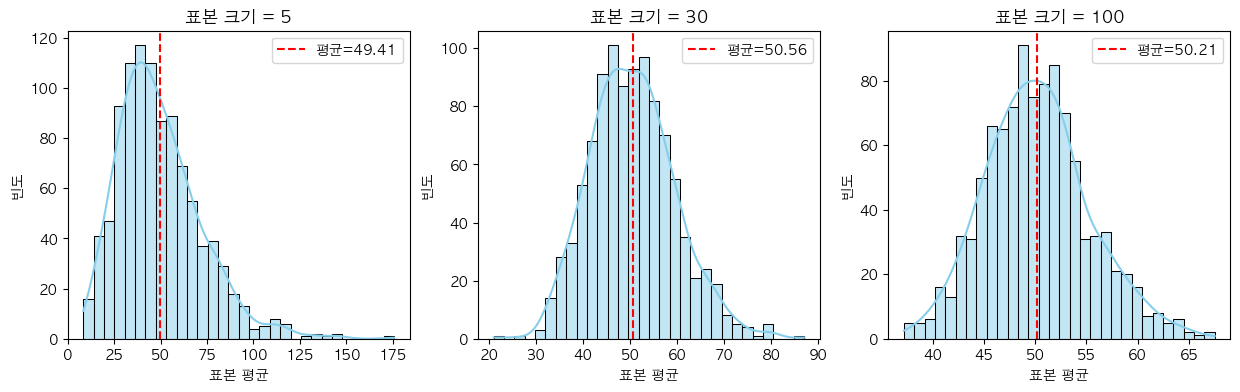

In [9]:
# Q3. 각 표본 크기별로 표본 평균들의 분포를 히스토그램으로 그려봅시다.
# 평균선을 함께 표시해 봅시다.

plt.figure(figsize=(15,4))

# 표본 크기 5
plt.subplot(1,3,1)
sns.histplot(sample_means_5, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.axvline(np.mean(sample_means_5), color="red", linestyle="--", label=f"평균={np.mean(sample_means_5):.2f}")
plt.title("표본 크기 = 5")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.legend()

# 표본 크기 30
plt.subplot(1,3,2)
sns.histplot(sample_means_30, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.axvline(np.mean(sample_means_30), color="red", linestyle="--", label=f"평균={np.mean(sample_means_30):.2f}")
plt.title("표본 크기 = 30")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.legend()

# 표본 크기 100
plt.subplot(1,3,3)
sns.histplot(sample_means_100, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.axvline(np.mean(sample_means_100), color="red", linestyle="--", label=f"평균={np.mean(sample_means_100):.2f}")
plt.title("표본 크기 = 100")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.legend()


### 🧠 데이터를 어떻게 읽을까요?

- 표본 크기가 작을 때 (예: 5), 평균들의 분포는 어떤 모양인가요?  
-> 분포가 넓고 들쭉날쭉하며, 원래 모집단(지수분포)의 비대칭적인 모습이 조금 남아 있다.

- 표본 크기가 커질수록 평균 분포의 모양은 어떤 변화를 보이나요?  
-> 점점 대칭적인 종 모양(정규분포 형태)에 가까워진다.

- 원래 모집단은 비대칭이었는데, 왜 평균들의 분포는 정규분포처럼 바뀌었을까요?  
-> 중심극한정리 때문에, 모집단의 분포 형태가 무엇이든 표본 평균의 분포는 표본 크기가 충분히 크면 정규분포에 수렴한다.

- 이 실험을 통해 중심극한정리를 어떻게 이해하게 되었나요?  
->표본 평균은 모집단 평균을 잘 추정하고, 표본 크기가 커질수록 분포가 안정되며 정규분포 형태로 가까워진다.

- 표본 크기에 따라 **분포의 넓이(흩어짐)**는 어떻게 달라지나요?  
-> 표본 크기가 작을수록 분포가 넓게 퍼져서 변동성이 크고, 표본 크기가 커질수록 분포가 좁아져 평균이 모집단 평균 주변에 더 밀집한다.


# 문제 3. 표준오차

### 📘 문제

- 앞선 실습에서 우리는 **표본 크기(n)가 커질수록 표본 평균들의 분포가 더 좁아진다**는 것을 확인했습니다.
- 이처럼 표본 평균들이 얼마나 흩어져 있는지(분포의 퍼진 정도)를 나타내는 값을 **표준오차(Standard Error, SE)**라고 부릅니다.
- 표준오차는 **표본 평균들의 표준편차**와 같은 의미이며, 이는 우리가 뽑은 표본 평균이 실제 모평균과 평균적으로 얼마나 떨어져 있을지를 나타내는 **'예상 오차의 크기'**입니다.

- 통계학적으로 이 표준오차는 **`SE = σ / √n`** (모집단 표준편차 / 표본 크기의 제곱근) 이라는 공식으로 계산할 수 있습니다.
- 이 공식은 **표본 크기(n)가 커질수록 표준오차(SE)가 작아진다**는 것을 명확히 보여줍니다.

- 이번 실습에서는 여러 크기의 표본을 뽑아, 시뮬레이션을 통해 얻은 **표본 평균들의 표준편차(실험값)**가 공식으로 계산한 **표준오차(이론값)**와 얼마나 일치하는지 직접 확인해봅니다.


### 📌 아래를 수행해 보세요:

- 모집단에서 여러 크기의 표본(10, 30, 100, 500)을 각각 1000번 뽑고, 그 평균들을 구한 뒤, **표본 평균들의 표준편차(=실험적 표준오차)**를 계산해봅시다.

- 이 결과를 이론적인 표준오차 공식과 비교하는 표를 만들고, 시각화해봅시다.

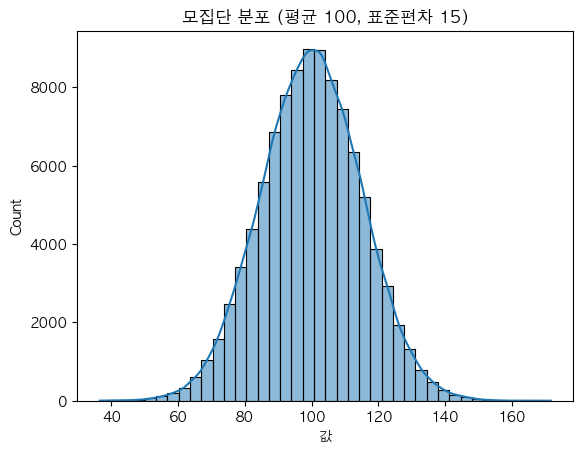

In [10]:
# 모집단 생성 (평균 100, 표준편차 15)
np.random.seed(2025)
population = np.random.normal(loc=100, scale=15, size=100000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("모집단 분포 (평균 100, 표준편차 15)")
plt.xlabel("값")
plt.show()

In [11]:
# Q1. 표본 크기 10, 30, 100, 500에 대해 각각 1000번 표본을 뽑고, 평균을 구해봅시다.
# 각 표본 평균 분포의 표준편차를 계산해봅시다.
# 결과를 리스트에 저장하고, 표로 정리해봅시다.

sample_sizes = [10, 30, 100, 500]
reps = 1000

def empirical_se_and_mean(n, reps=1000):
    means = np.empty(reps)
    for i in range(reps):
        means[i] = np.random.choice(population, size=n, replace=False).mean()
    return means.std(ddof=1), means.mean()

rows = []
for n in sample_sizes:
    se_emp, mean_of_means = empirical_se_and_mean(n, reps)
    rows.append({"n": n, "empirical_SE":se_emp, "means_mean": mean_of_means})

se_df = pd.DataFrame(rows)
se_df

,n,empirical_SE,means_mean
0,10,4.659081,99.983758
1,30,2.786076,99.972731
2,100,1.526038,99.980953
3,500,0.663386,99.959463


In [12]:
# Q2. 이론적인 표준오차와 비교해봅시다.
# [공식] 표준오차(SE) = 모집단 표준편차 / √표본크기

sigma = np.std(population, ddof=0)  # 모집단 표준편차 (ddof=0: 모표준편차)
se_df['theoretical_SE'] = sigma / np.sqrt(se_df["n"])
se_df["ratio_emp/theory"] = se_df["empirical_SE"] / se_df["theoretical_SE"]

display_df = se_df.copy()
display_df[["empirical_SE","theoretical_SE","ratio_emp/theory","means_mean"]] = \
    display_df[["empirical_SE","theoretical_SE","ratio_emp/theory","means_mean"]].round(3)
display_df

,n,empirical_SE,means_mean,theoretical_SE,ratio_emp/theory
0,10,4.659,99.984,4.754,0.980
1,30,2.786,99.973,2.745,1.015
2,100,1.526,99.981,1.503,1.015
3,500,0.663,99.959,0.672,0.987


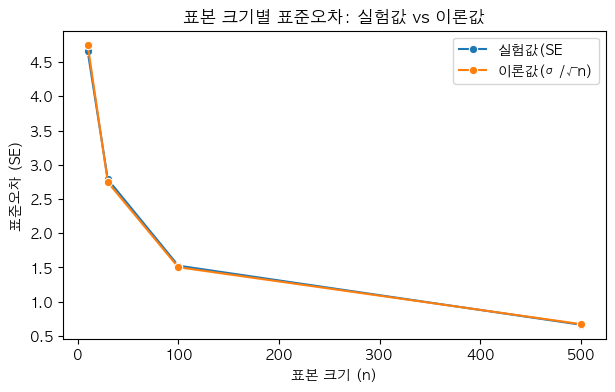

In [13]:
# Q3. 실험값과 이론값을 시각화해봅시다.
# 표본 크기를 x축, 표준오차를 y축으로 한 꺾은선 그래프를 그려봅시다.

plt.figure(figsize=(7,4))
sns.lineplot(x="n", y="empirical_SE", data=se_df, marker="o", label="실험값(SE")
sns.lineplot(x="n", y="theoretical_SE", data=se_df, marker="o", label="이론값(σ/√n)")
plt.title("표본 크기별 표준오차: 실험값 vs 이론값")
plt.xlabel("표본 크기 (n)")
plt.ylabel("표준오차 (SE)")
plt.legend()
plt.show()

### 🧠 데이터를 어떻게 읽을까요?

- 표본 크기가 작을수록, 표본 평균의 분포는 어떤 모양인가요? 넓게 퍼져 있나요?  
-> 표본 크기가 작으면 분포가 넓게 퍼지고 들쭉날쭉해, 평균이 모평균에서 더 크게 흔들릴 수 있다.

- 표본 크기가 커질수록, 평균 분포는 어떻게 변하나요?  
-> 점점 좁고 뾰족해지며, 모평균 근처에 밀집한다. (평균이 더 안정적으로 추청된다.)

- 실험값과 이론값(공식 계산값)은 얼마나 비슷한가요?  
-> 두 값이 거의 일치한다. 실험적으로 얻은 표준오차와 공식 SE = σ / √n 계산값이 비슷해, 이론이 실제로도 잘 맞음을 보여준다.

- 왜 표본 크기가 커질수록 표준오차는 작아질까요?  
-> 표본이 많아질수록 우연에 의한 흔들림이 줄어들고, 평균이 모평균에 더 가깝게 수렴하기 때문이다. (표본이 커지면 평균이 덜 흔들려서 오차가 줄어든다.)


# 문제 4. 신뢰구간 계산과 해석

### 📘 문제

- 표본 평균은 모집단 평균을 추정하는 좋은 점 추정(Point Estimation) 값이지만, 표본오차 때문에 정확히 일치하지는 않습니다.

- 그래서 우리는 "모집단 평균이 아마 이 범위 안에 있을 것이다"라고 **구간으로 추정(Interval Estimation)**하는 것이 더 합리적입니다. 이때 사용하는 개념이 바로 **신뢰구간(Confidence Interval)**입니다.

- 신뢰구간은 표본평균 ± 오차범위 형태로 계산되며, 이 오차범위는 신뢰수준(예: 95%, 99%)과 표본오차에 의해 결정됩니다.

- 이번 실습에서는 **모집단 표준편차(σ)를 알 때(z-분포)**와 **모를 때(t-분포)**의 신뢰구간을 각각 계산해보고, 신뢰수준에 따라 구간의 폭이 어떻게 변하는지 확인해봅니다.

### 📌 아래를 수행해 보세요:

- 모집단에서 30명을 무작위로 뽑아 평균, 표준편차, 표준오차를 계산해보세요.

- 95% 신뢰구간을 z-분포와 t-분포를 각각 사용해서 계산해보세요.

- 신뢰수준을 바꿨을 때(90%, 99%) 신뢰구간이 어떻게 변하는지 확인해보세요.


### 자주 헷갈리는 부분 정리

- ppf: Percent Point Function (= 역누적분포함수)
“누적확률이 p가 되게 하는 값”을 돌려줌. 0.975 → z≈1.96

- ddof=1: 표본 표준편차(나누기 n-1). 표본에서 모수를 추정할 때 편향을 줄이려고 사용.

- SE vs 표준편차:
표준편차: “데이터 자체” 흩어짐
표준오차(SE): “평균”이 흔들리는 정도 (≈ 평균의 불확실성)

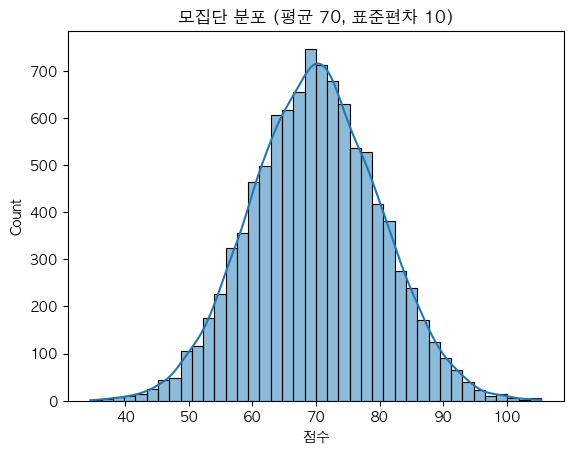

In [14]:
# 모집단 생성
np.random.seed(2025)
population = np.random.normal(loc=70, scale=10, size=10000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("모집단 분포 (평균 70, 표준편차 10)")
plt.xlabel("점수")
plt.show()

In [15]:
# Q1. 모집단에서 표본 30명을 무작위로 추출하고, 표본 평균과 표준편차를 구해봅시다.
# 표준오차도 함께 계산해보세요.

sample = np.random.choice(population, size=30, replace=False)

sample_mean = sample.mean()
sample_std = sample.std(ddof=1)     # 표본 표준편차
se = sample_std / np.sqrt(len(sample))  # 표준오차

In [16]:
# Q2. 모집단의 표준편차를 알고 있다고 가정하고, z-분포를 사용하여 95% 신뢰구간을 계산해봅시다.
# st.norm.ppf(p): 표준정규분포에서 누적확률이 p가 되게 하는 분위값
# 95% 양측 신뢰구간은 가운데 95%를 남기고 양끝 2.5%씩 버리므로 0.975 사용

import scipy.stats as st

sigma = 10                      # 모집단 표준편차(알고 있다고 가정)
z = st.norm.ppf(0.975)          # 95% 양측 → 0.975 분위수 ≈ 1.96
se_z = sigma / np.sqrt(len(sample))

ci_z = (sample_mean - z*se_z, sample_mean + z*se_z)    # 신뢰구간 공식: 평균 ± 임계값 × SE (여기서는 z값과 σ/√n(z에서 쓰는 SE)을 사용)
print(f"z-95% 신뢰구간: {ci_z[0]:.2f} ~ {ci_z[1]:.2f} (폭 {ci_z[1]-ci_z[0]:.2f})")

z-95% 신뢰구간: 64.03 ~ 71.18 (폭 7.16)


In [17]:
# Q3. 모집단의 표준편차를 모른다고 가정하고, 표본 표준편차와 t-분포를 사용하여 95% 신뢰구간을 계산해봅시다.
# 모집단 표준편차를 모르니 표본 표준편차를 쓰고, 분포는 t-분포를 사용
# 표본이 적을수록(t의 꼬리가 두꺼워서) 구간이 더 넓게 나온다

df = len(sample) - 1            # 자유도(표본개수 - 1)
tcrit = st.t.ppf(0.975, df=df)  # t-분포 임계값

ci_t = (sample_mean - tcrit*se, sample_mean + tcrit*se)     # 신뢰구간 공식: 평균 ± 임계값 × SE (t값과 표본 기반 SE(= sample_std/√n) 를 사용)
print(f"t-95% 신뢰구간: {ci_t[0]:.2f} ~ {ci_t[1]:.2f} (폭 {ci_t[1]-ci_t[0]:.2f})")

t-95% 신뢰구간: 63.47 ~ 71.74 (폭 8.27)


In [20]:
# Q4. 신뢰수준을 90%, 99%로 바꿔가며 신뢰구간을 계산해보고, 그 폭을 비교해봅시다.

levels = [0.90, 0.95, 0.99]     # 신뢰수준 리스트
rows = []
n = len(sample)

for level in levels:
    alpha = 1 - level                       # 남기는 확률 외 나머지: 1 - 신뢰수준 (예: 95% → alpha=0.05)
    zcrit = st.norm.ppf(1 - alpha/2)        # z 임계값(양측): 1 - alpha/2, 양측이므로 양끝을 반으로 나눔(예: 0.975)
    tcrit = st.t.ppf(1 - alpha/2, df=n-1)   # t 임계값(양측)

    # z-구간: σ=10을 안다고 가정, SE는 sigma/√n
    se_z = sigma / np.sqrt(n)
    z_low, z_high = sample_mean - zcrit*se_z, sample_mean + zcrit*z
    z_width = z_high - z_low                # 구간 폭


    # t-구간: σ를 모르니 표본 SE 사용
    t_low, t_high = sample_mean - tcrit*se, sample_mean + tcrit*se
    t_width = t_high - t_low
    
    rows += [
        {"level": f"{int(level*100)}%", "method":"z", "low":z_low, "high":z_high, "width":z_width},
        {"level": f"{int(level*100)}%", "method":"t", "low":t_low, "high":t_high, "width":t_width}
    ]

ci_df = pd.DataFrame(rows)                  # rows(딕셔너리들의 리스트)를 표(데이터프레임)로 변환
ci_df_round = ci_df.copy()
ci_df_round[["low","high","width"]] = ci_df_round[["low","high","width"]].round(2)  # 소수점 2자리 반올림해서 보기 좋게 출력
print(ci_df_round.sort_values(["level","method"]).to_string(index=False))           # 정렬: level(신뢰수준), method(z/t) 순서대로

level method   low  high  width
  90%      t 64.17 71.04   6.87
  90%      z 64.60 70.83   6.23
  95%      t 63.47 71.74   8.27
  95%      z 64.03 71.45   7.42
  99%      t 62.03 73.18  11.15
  99%      z 62.90 72.65   9.75


In [23]:
width_table = (ci_df.pivot(index="level", columns="method", values="width")
               .rename(columns={"z":"z폭", "t":"t폭"})
               .round(2))
width_table

method,t폭,z폭
level,,
90%,6.87,6.23
95%,8.27,7.42
99%,11.15,9.75


### 🧠 데이터를 어떻게 읽을까요?

- z-분포와 t-분포를 사용한 신뢰구간은 얼마나 차이가 있나요?  
-> 95%에서 z 폭 7.42,t-구간 8.27로 t가 더 넓다(자유도 29의 t-분포가 꼬리가 두꺼워서).

- 신뢰수준이 높아질수록 신뢰구간의 폭은 어떻게 변하나요? 왜 그럴까요?  
-> 90% → 95% → 99%로 갈수록 폭이 커진다. 임계값(z/t)이 커지고, 폭 = 2 x 임계값 x  SE이므로 넓어진다.

- 신뢰구간이 넓다는 건 좋은 걸까요? 나쁜 걸까요?  
-> 너무 넓으면 실무 활용성이 떨어지고, 너무 좁으면 모평균을 놓칠 위험이 커짐. 관행적으로 95%를 많이 쓴다.  
-> 폭을 줄이려면 표본 크기를 늘리거나(SE↓) 측정 변동(σ)을 줄이면 된다.
- 이 데이터가 실제 고객 만족도라면, 신뢰구간 정보를 마케팅 전략에 어떻게 활용할 수 있을까요?  
-> "표본평균은 약 67.6점이고, 95% 신뢰구간은 z: 64.03~71.45, t: 63.47~71.74"라고 제시.  
  - 목표(예: 70점 이상)를 판단할 때, 구간이 70을 포함하므로 ‘70 이상이라고 단정하기 어렵다 → 표본을 더 늘려 불확실성(폭)을 줄이자’ 같은 의사결정에 사용.  
  - 캠페인/개선 후 전·후 CI가 겹치는지로 효과 검증.  
  - 지역/채널별로 CI 비교해 우선순위 정하기.


# 문제 5. 미니 프로젝트 - 고객 만족도 신뢰구간 추정

### 📘 문제

- 전체 고객 10,000명을 대상으로 만족도 조사를 하는 것은 시간과 비용이 많이 듭니다.
- 그래서 우리는 무작위로 일부 고객만 조사하여, 전체 고객의 평균 만족도를 추정하려 합니다.

- 이 프로젝트에서는 실제와 같은 상황을 가정하여, 표본을 뽑고 신뢰구간을 계산한 뒤, 이 결과를 바탕으로 마케팅 전략에 어떻게 활용할 수 있을지까지 생각해보는 실습을 진행합니다.

### 📌 아래를 수행해 보세요:

- 모집단을 생성하고, 거기서 표본을 40명 뽑아 평균을 계산해봅시다.

- 표본 평균과 표준편차를 바탕으로 95% 신뢰구간을 계산해봅시다.

- 히스토그램을 그리고 신뢰구간을 시각화해봅시다.

- 이 결과를 어떻게 해석하고, 마케팅 전략에 활용할 수 있을지 생각해봅시다.


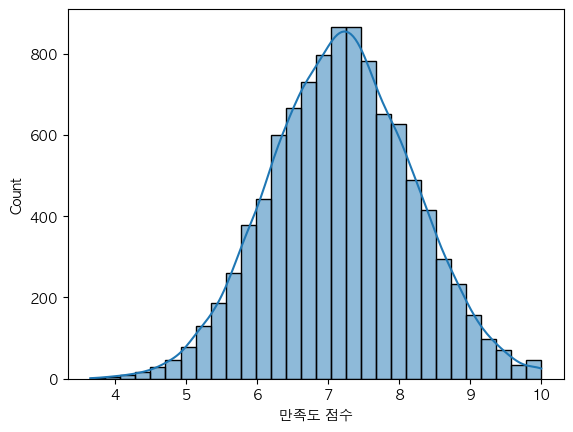

In [22]:
# 모집단 생성 (고객 만족도 10,000명)
np.random.seed(2025)
population = np.random.normal(loc=7.2, scale=1.0, size=10000)
population = np.clip(population, 1, 10)

# 모집단 시각화
sns.histplot(population, bins=30, kde=True)
plt.xlabel("만족도 점수")
plt.show()

In [28]:
# Q1. 모집단에서 표본 40명을 무작위로 추출하고, 표본 평균과 표준편차를 구해봅시다.

sample = np.random.choice(population, size=40, replace=False)

sample_mean = sample.mean()
sample_std = sample.std(ddof=1)     # 표본 표준편차 (ddof=1)
print(f"표본평균 = {sample_mean:.2f}, 표본표준편차 = {sample_std:.2f}")

표본평균 = 7.09, 표본표준편차 = 1.08


In [29]:
# Q2. 표준오차(SE)를 구하고, t-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

n = len(sample)
se = sample_std / np.sqrt(n)        # 표준오차
tcrit = st.t.ppf(0.975, df=n-1)     # 95% 양측 → 0.975 분위수

ci_low = sample_mean - tcrit * se
ci_high = sample_mean + tcrit * se

print(f"SE = {se:.3f}")
print(f"신뢰구간 (t): {ci_low:.2f} ~ {ci_high:.2f} (폭 {ci_high - ci_low:.2f})")

SE = 0.170
신뢰구간 (t): 6.74 ~ 7.43 (폭 0.69)


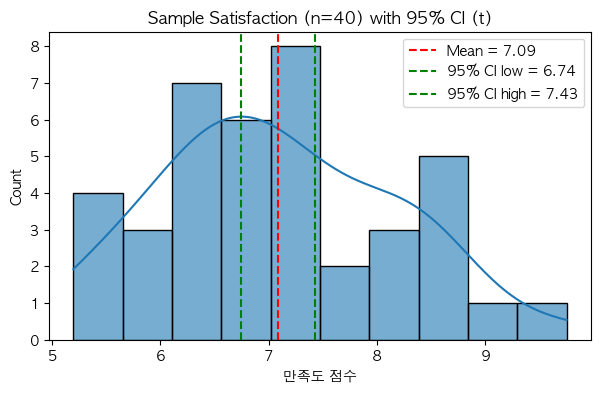

In [30]:
# Q3. 표본 데이터의 히스토그램을 그리고, 평균 및 신뢰구간을 함께 시각화해봅시다.

plt.figure(figsize=(7,4))
sns.histplot(sample, bins=10, kde=True, alpha=0.6)
plt.axvline(sample_mean, color="red", linestyle="--", label=f"Mean = {sample_mean:.2f}")
plt.axvline(ci_low,  color="green", linestyle="--", label=f"95% CI low = {ci_low:.2f}")
plt.axvline(ci_high, color="green", linestyle="--", label=f"95% CI high = {ci_high:.2f}")
plt.title("Sample Satisfaction (n=40) with 95% CI (t)")
plt.xlabel("만족도 점수")
plt.legend()
plt.show()

# Q4. 신뢰구간의 결과에 따라 어떤 구체적인 마케팅 전략을 세울 수 있을까요?
🧠 해석  
1. 표본 평균 vs 모집단 추정  
-> 고객 만족도 평균은 약 7점 전후로 추정됨.
2. 신뢰구간 의미  
-> "전체 고객의 평균 만족도는 95% 확률로 6.74 ~ 7.43 사이에 있을 것"이라고 말할 수 있음.
3. 폭(0.69)
-> 비교적 좁은 편이라, 표본 수(40명)로도 꽤 안정적인 추정이 됨.
-> 더 큰 표본을 쓰면 폭은 더 줄어듦.

📌 마케팅 전략 활용
- 긍정적 메시지 활용:  
"우리 고객의 평균 만족도는 7점 이상!" → CI 하한선(6.74)이 목표 7점에 약간 못 미치지만, 평균은 7.09로 홍보 가능.  
- 불확실성 관리:  
7점을 기준으로 볼 때, CI가 7을 포함하므로 '무조건 7점 이상'이라고 단정할 수 없음 → 표본을 늘려 확인 필요.
- 실행 아이디어:  
만족도 7점 이상 고객층을 대상으로 추천/후기 마케팅 강화.  
6점대 고객층 인터뷰해서 불만 요인 분석 후 개선.  
 캠페인 전･후에 CI 비교  → 구간이 오른쪽으로 이동하면 효과 검증 완료.

### 🧠 데이터를 어떻게 읽을까요?

- 신뢰구간은 몇 점에서 몇 점 사이인가요?  
-> 95% 신뢰구간은 6.74점 ~ 7.43점 사이.

- 이 구간은 전체 모집단 평균을 포함하고 있나요?  
-> 모집단 평균(7.2)을 포함하고 있으며, 표본 추정이 모집단을 잘 반영하고 있다.

- 이 결과를 바탕으로 고객 만족도가 충분히 높다고 말할 수 있을까요?  
-> 평균이 7점 이상으로 추정되지만, 신뢰구간 하한이 6.74로 살짝 낮기 때문에 "7점 이상 확실하다"고 단정할 수는 없다.  
-> 다만 전체적으로는 긍정적인 수준으로 평가 가능하다.

- 만약 신뢰구간이 너무 넓게 나왔다면, 그 이유는 무엇이고 어떻게 개선할 수 있을까요?  
-> 이유: 표본 크기가 적거나(40명) 표본 내 변동성이 크기 때문이다.  
-> 개선: 더 많은 고객을 조사하거나, 조사 방법을 개선해 표본 표준편차를 줄이면 신뢰구간 폭이 좁아져 추정이 더 정밀해진다.